# Ford GoBike Data Exploration
## by Gary Lau

## Preliminary Wrangling

The dataset contains bike usage data such as riding duration, start and end time on Feb 2019. Also it contains users' information like member type, birth year and gender.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### Assess

Check for missing data and data type.

In [3]:
# check for missing data and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

Some missing data for member_birth_year and member_gender. Erroreous data type for `start_station_id`, `end_station_id`, `bike_id`, `member_birth_year`, `member_gender`, `bike_start_for_all_trip`, `start_time`, `end_time`, `user_type`

Check for any abnormal outlier.

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


`member_birth_year` minimum year is 1878, which is impossible.

- Erroreous data type for `start_station_id`, `end_station_id`, `bike_id`, `member_birth_year`, `member_gender`, `bike_start_for_all_trip`, `start_time`, `end_time`, `user_type`
-`member_birth_year` minimum year is 1878, which is impossible.

#### Clean

Change `member_birth_year` to `Int64` type

In [5]:
df['member_birth_year'] = df['member_birth_year'].astype('Int64')
df.member_birth_year.dtype

Int64Dtype()

Change `start_station_id`, `end_station_id`, `bike_id` to `object` type

In [6]:
for col in ['start_station_id', 'end_station_id', 'bike_id']:
    df[col] = df[col].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  object 
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  object 
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  object 
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  Int64  
 14  memb

Change `member_gender`, `bike_start_for_all_trip`, `user_type` to `categorical` type

In [7]:
for col in ['member_gender', 'bike_share_for_all_trip', 'user_type']:
    df[col] = df[col].astype("category")

Change `start_time`, `end_time` to `Datetime` type

In [8]:
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.start_time)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

Remove row with impossible birth year. I assume 1919 (age 100) as the cutoff year. People with age 100 or above are unlikely to rent a share bike.

In [10]:
df = df[df['member_birth_year'] > 1919]

In [11]:
sum(df['member_birth_year'].isna())

0

In [12]:
sum(df['member_birth_year'] <=1919)

0

### What is the structure of your dataset?

This dataset record bike-sharing usage data around greater San Francisco Bay Area. 

### What is/are the main feature(s) of interest in your dataset?

1. User distributions.
2. When is the most popular time for bike rental in terms of time of hours and day of weeks.
3. What is the user's main purpose of using GoBike, commuting or lesiurely ride?
4. Is there any distinct usage pattern for causal riders and subscribers? 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?



## Univariate Exploration

First, I will look at user's gender proportion.

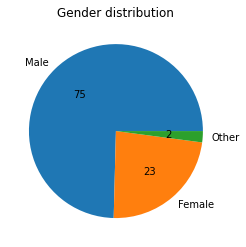

In [13]:
gender = df.member_gender.value_counts()
plt.pie(x=gender, labels=gender.index, autopct="%.f")
plt.title('Gender distribution');

Three quarters of bike users are male. 

In [14]:
df.user_type.value_counts()

Subscriber    158449
Customer       16626
Name: user_type, dtype: int64

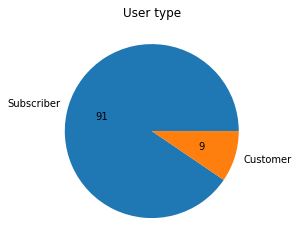

In [15]:
user_type = df.user_type.value_counts()
plt.pie(x=user_type, labels=user_type.index, autopct="%.f")
plt.title('User type');

The majority of users are subscriber.

### User demographic

In [16]:
# get user's age as it's easier to interprete
df['age'] = 2019 - df.member_birth_year

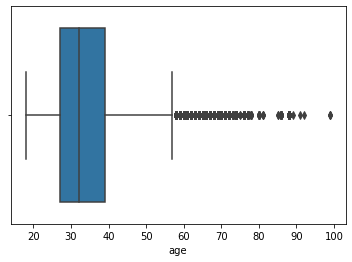

In [18]:
sb.boxplot(data=df, x='age');

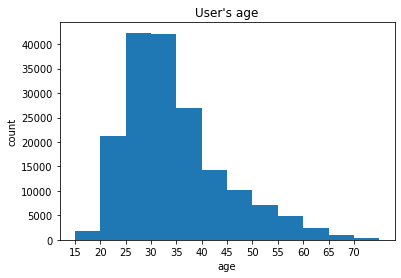

In [17]:
ticks = np.arange(15, 75, 5)
label = [v for v in range(15, 75, 5)]
bins = np.arange(15, 80, 5)
plt.hist(data=df.dropna(), x='age', bins=bins)
plt.xlabel('age')
plt.ylabel('count')
plt.xticks(ticks, label)
plt.title('User\'s age');

User's age follows a right-skew pattern with peak at age 25-35.

In [19]:
# get start time day of week
df['start_time_day_of_week'] = df.start_time.dt.dayofweek + 1
# get start time hour
df['start_time_hour'] = df.start_time.dt.hour

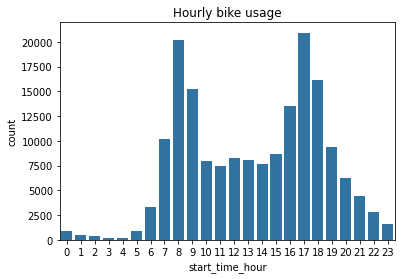

In [20]:
# hourly usage
sb.countplot(data=df, x='start_time_hour', color=sb.color_palette()[0]);
plt.title('Hourly bike usage');

The hourly bike usage graph peak at 8 and 17, indicating most bike usage occur during rush hours, where people use bike for commuting to and from work. We can further look at the pattern by separating weekday and weekend usage later during Bivariate Exploration.

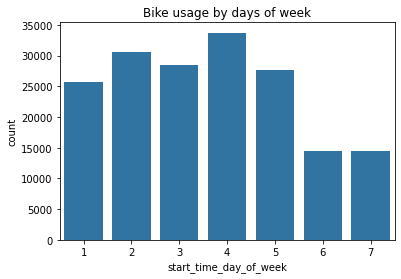

In [21]:
sb.countplot(data=df, x='start_time_day_of_week', color=sb.color_palette()[0]);
plt.title('Bike usage by days of week');

Bike usage on weekend are less than those on weekdays, suggesting the bikes are more likely to be used for commuting rather than lesuire.

In [22]:
# start_time by day
df_by_day = df.groupby(pd.Grouper(key='start_time', freq='W')).count().bike_id.reset_index()
df_by_day.rename(columns={'bike_id':'count'}, inplace=True)

Next, let's look at riding duration distribution.

In [23]:
# convert to riding minutes for easier interpretation
df['duration_minute'] = df.duration_sec / 60

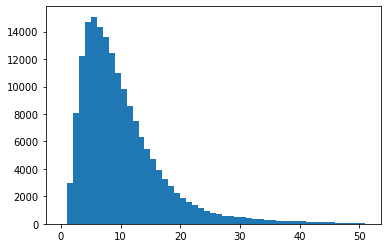

In [24]:
bins = np.arange(0, 52, 1)
plt.hist(data=df, x='duration_minute', bins=bins);

The graph shows a right-skew pattern, with peak around 5 minutes. It indicates most users use the bike for short commuting purpose rather than longer leisurely ride , which match the observation of hourly and weekly usage.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There is no need for transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I have already delete data for age > 100 during data wrangling as people from this age group are unlikely to use a share-bike and are more likely to be erroneous member data. For riding durations, since most |of the rides are less than 20 minutes, I ignore the outliers with very long riding minutes as it doesn't affect the analysis.

## Bivariate Exploration

Check if there is any correlation between riding duration and age.

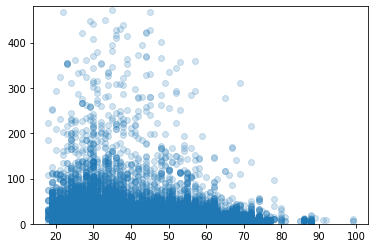

In [25]:
plt.scatter(data=df, x='age', y='duration_minute', alpha=0.2);
plt.ylim(0, 480);

As expected, most rides are short ride and younger users tend to have more longer rides.

Let's look at hourly bike usage count by weekday/weekend.

In [26]:
# create column 'is_weekday' for identify whether a day is weekday or not
df['is_weekday'] = df['start_time_day_of_week'] <= 5
df['is_weekday']

0         True
2         True
3         True
4         True
5         True
          ... 
183407    True
183408    True
183409    True
183410    True
183411    True
Name: is_weekday, Length: 175075, dtype: bool

C:\Users\user\anaconda3\envs\dw_2\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


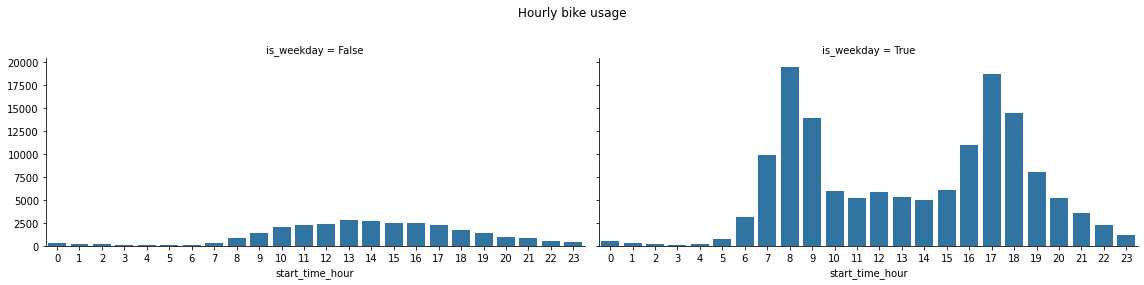

In [27]:
g = sb.FacetGrid(data=df, col='is_weekday', height = 4, aspect=2)
g.map(sb.countplot, 'start_time_hour')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Hourly bike usage');

The weekday hourly usage graph follow the same pattern with peaks at 8 and 17, while the weekend graph display a different shape: a bell shape during the day with peak around 13. Also the bike usage is significantly lower during weekend.

Riding durations by weekday/weekend

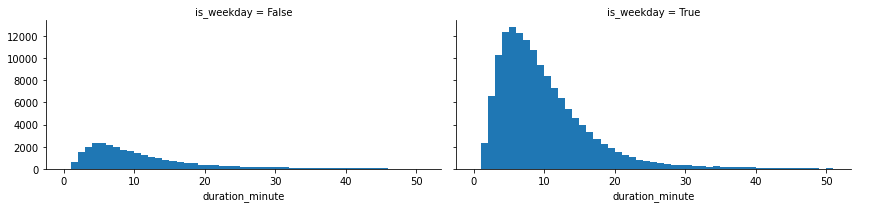

In [28]:
bins = np.arange(0, 52, 1)
g = sb.FacetGrid(data=df, col='is_weekday', aspect=2)
g.map(plt.hist, 'duration_minute', bins=bins)
g.add_legend();

Riding durations on weekends follow similar pattern of weekdays, suggesting even on weekend, user mostly use GoBike for commuting, rather than for leisurely ride. 

## Multivariate Exploration
Let's further look at hourly bike usage pattern by different variable and see if there are any distinctive pattern. 

C:\Users\user\anaconda3\envs\dw_2\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


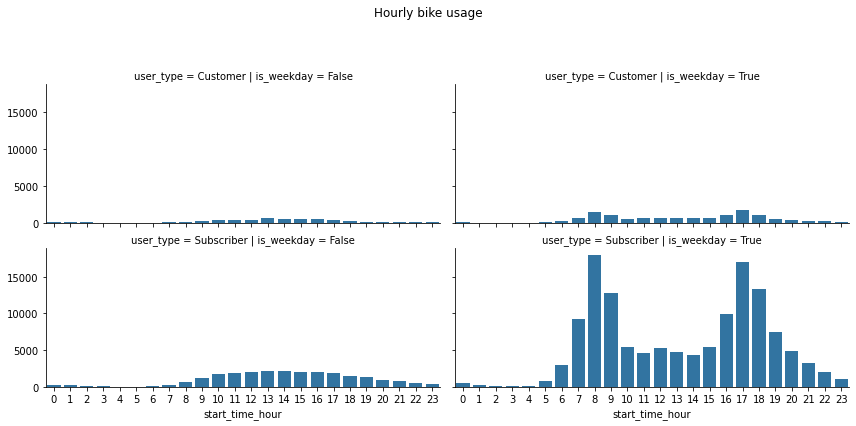

In [29]:
g = sb.FacetGrid(data=df, row='user_type', col='is_weekday', aspect=2)
g.map(sb.countplot, 'start_time_hour')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Hourly bike usage');

Subscriber and customer share the same hourly usage patter, with significantly less overall usage for customers.

### Conclusion

GoBike is primarily be used for commuting purpose. It might be due to the model of the bike and hilly terrain around the Bay area. Hence, to promote the usage of GoBike, insentive related to transit can be used, such as offer coupons for using public transportation for GoBike members. 